# Muhahaha

In [1]:
from model import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import *
from sklearn.metrics import silhouette_score
import gmaps
import gmaps.datasets
from plotting import *

In [ ]:
plot_bayarea(dist_method='absolute', link_method='ward', k=25, alpha=0.7)

In [ ]:
plot_nyc(dist_method='absolute', link_method='ward', k=5, alpha=2)

In [ ]:
plot_state('WA', dist_method='absolute', link_method='ward', k=20, alpha=2)

In [7]:
def plot_flows(df_area_colored, n=1000, alpha=0.1, alpha_flows=True):
    df_area_colored_n = df_area_colored.head(n)
    flow_max = df_area_colored_n['FLOW'].max()

    for i, row in df_area_colored_n.iterrows():
        rgb = (row['r'], row['g'], row['b'])
        if alpha_flows:
            alpha = row['FLOW']/flow_max
        plt.plot((row['INTPTLONG_O'],row['INTPTLONG_D']),(row['INTPTLAT_O'],row['INTPTLAT_D']),alpha=alpha, color=rgb)

In [6]:
df_merged, df_tracts = get_commute_dfs()

In [4]:
# Limits views to CA
df_area= limit_area(df_merged,state='CA')

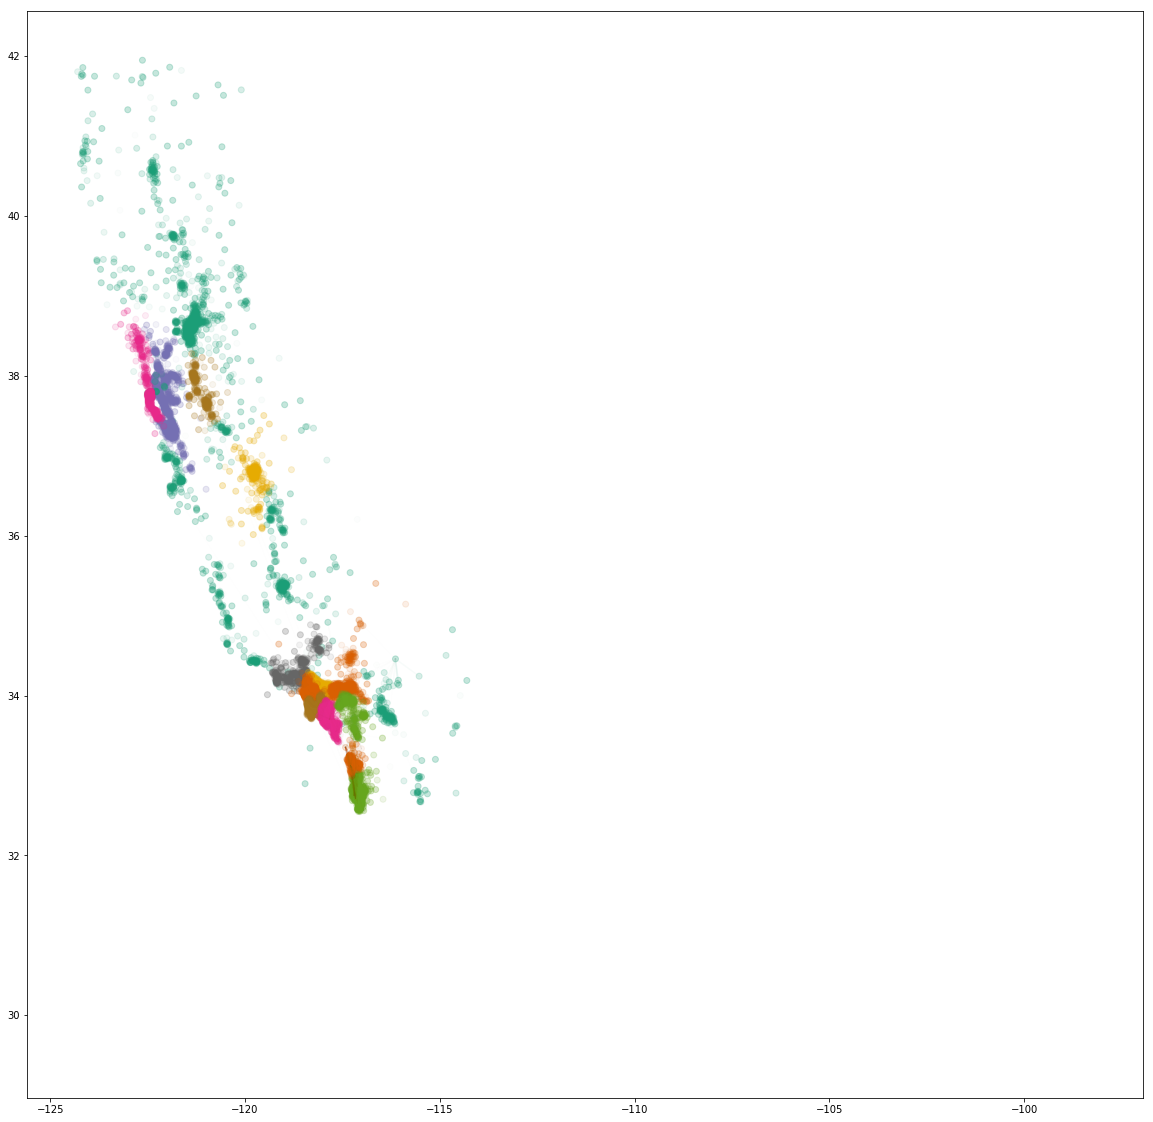

In [5]:
df_results = cluster_and_plot(df_area, df_tracts, dist_method='absolute', link_method='ward', k=20, alpha=0.5, cmap=cm.Dark2, cnum=8)
df_area_colored = df_area.merge(df_results,how='left',left_on='GEOID_O',right_on='GEOID')
plot_flows(df_area_colored, n=10000)

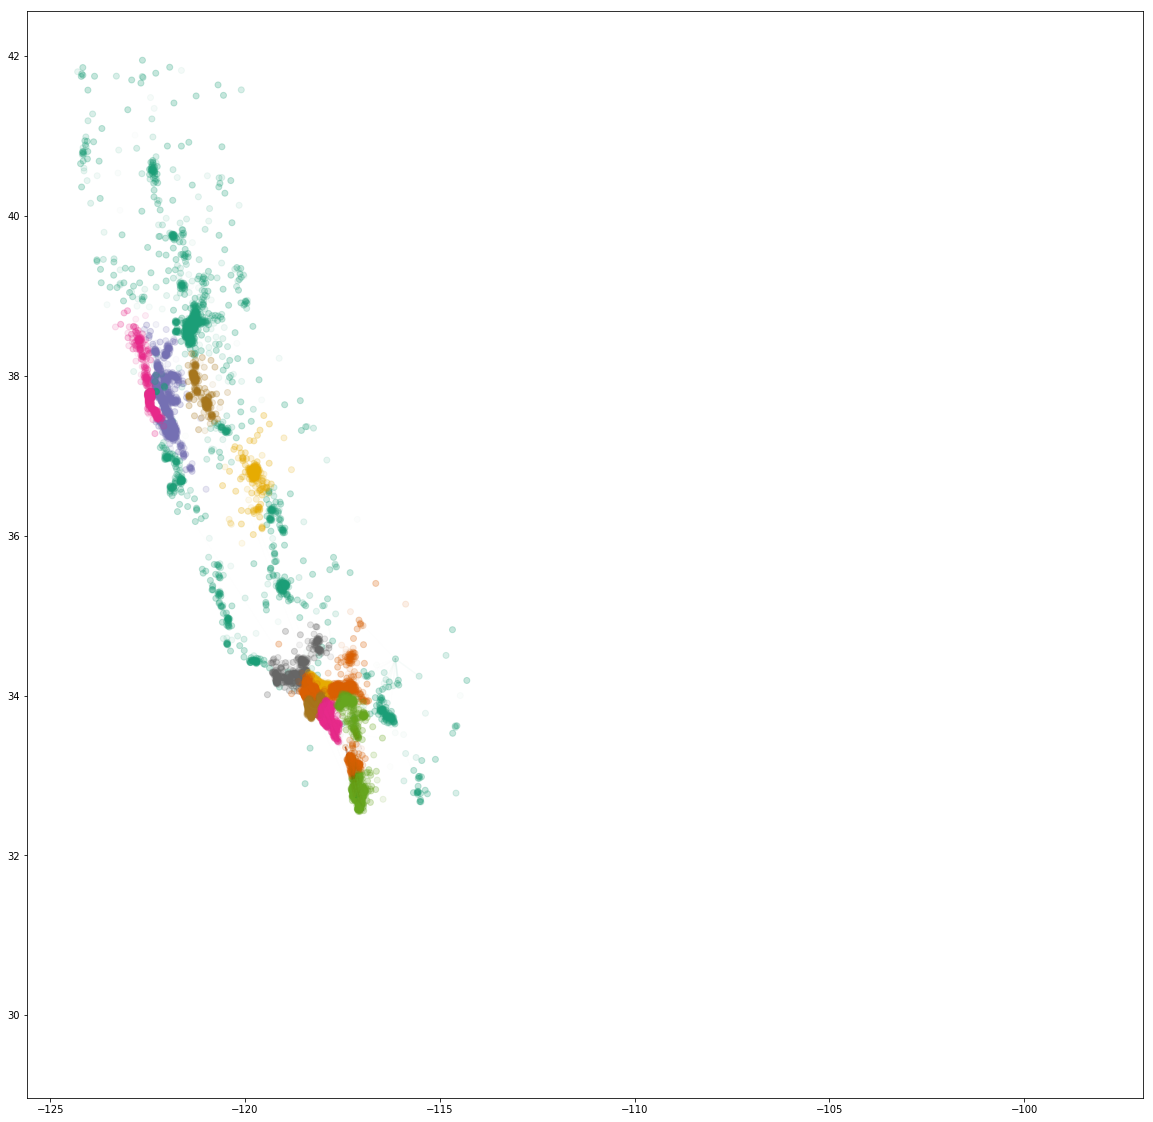

In [6]:
df_results = cluster_and_plot(df_area, df_tracts, dist_method='absolute', link_method='ward', k=20, alpha=0.5, cmap=cm.Dark2, cnum=8)
df_area_colored = df_area.merge(df_results,how='left',left_on='GEOID_D',right_on='GEOID')
plot_flows(df_area_colored, n=10000)

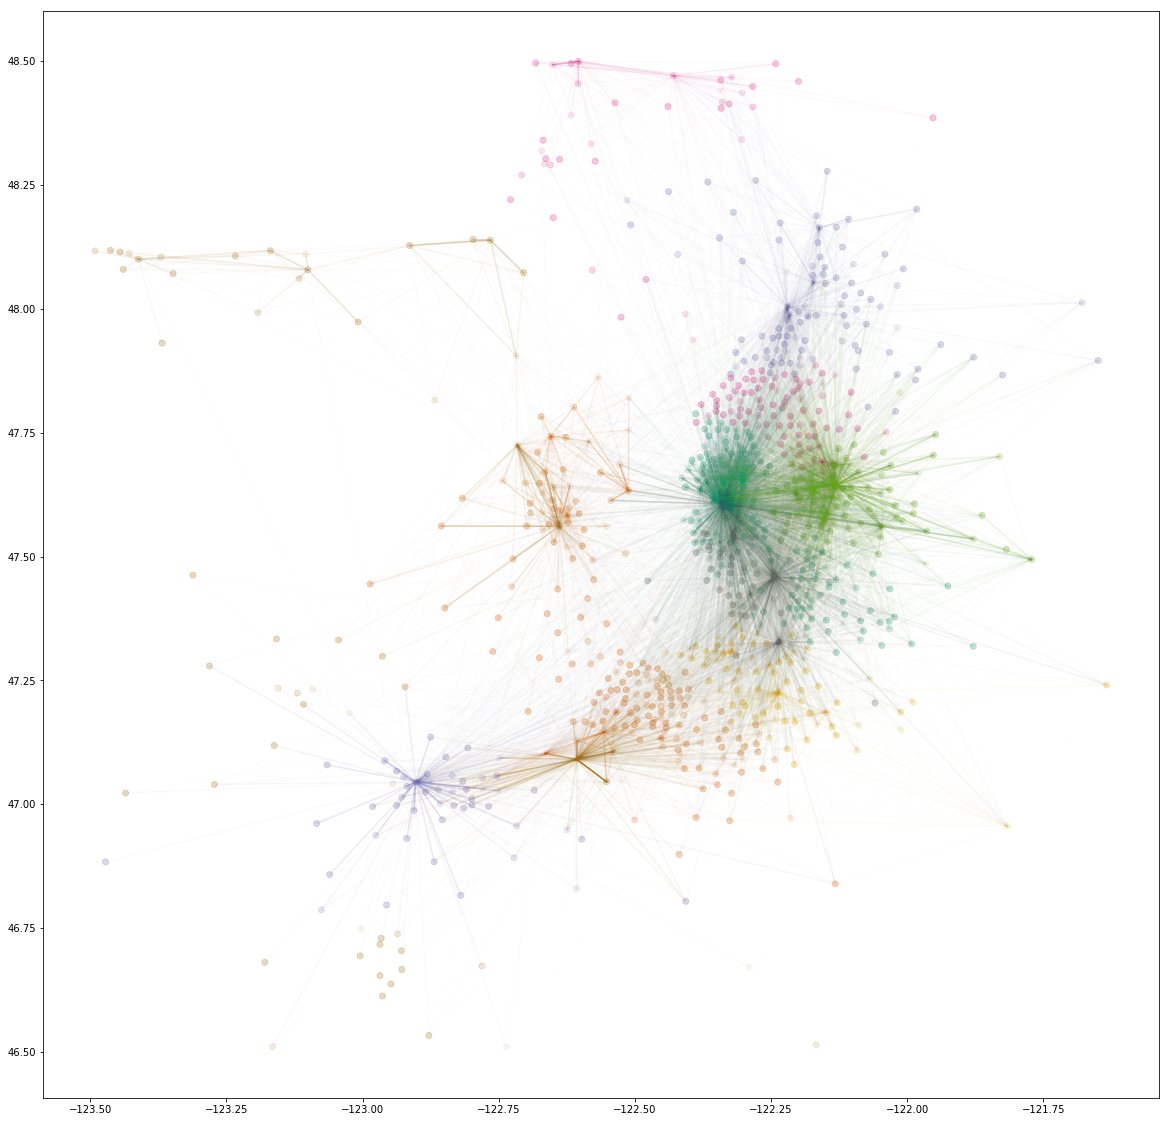

In [10]:
#Testing Seattle Destinations
df_area= limit_area(df_merged,minlat=46.5, maxlat=48.5, minlong = -123.5, maxlong=-121.5)
df_results = cluster_and_plot(df_area, df_tracts, dist_method='absolute', link_method='ward', k=12, alpha=0.5, cmap=cm.Dark2, cnum=8)

df_area_colored = df_area.merge(df_results,how='left',left_on='GEOID_D',right_on='GEOID')
n = 10000
df_area_colored_n = df_area_colored.head(n)
flow_max = df_area_colored_n['FLOW'].max()

for i, row in df_area_colored_n.iterrows():
    rgb = (row['r'], row['g'], row['b'])
    plt.plot((row['INTPTLONG_O'],row['INTPTLONG_D']),(row['INTPTLAT_O'],row['INTPTLAT_D']),alpha=row['FLOW']/flow_max, color=rgb)

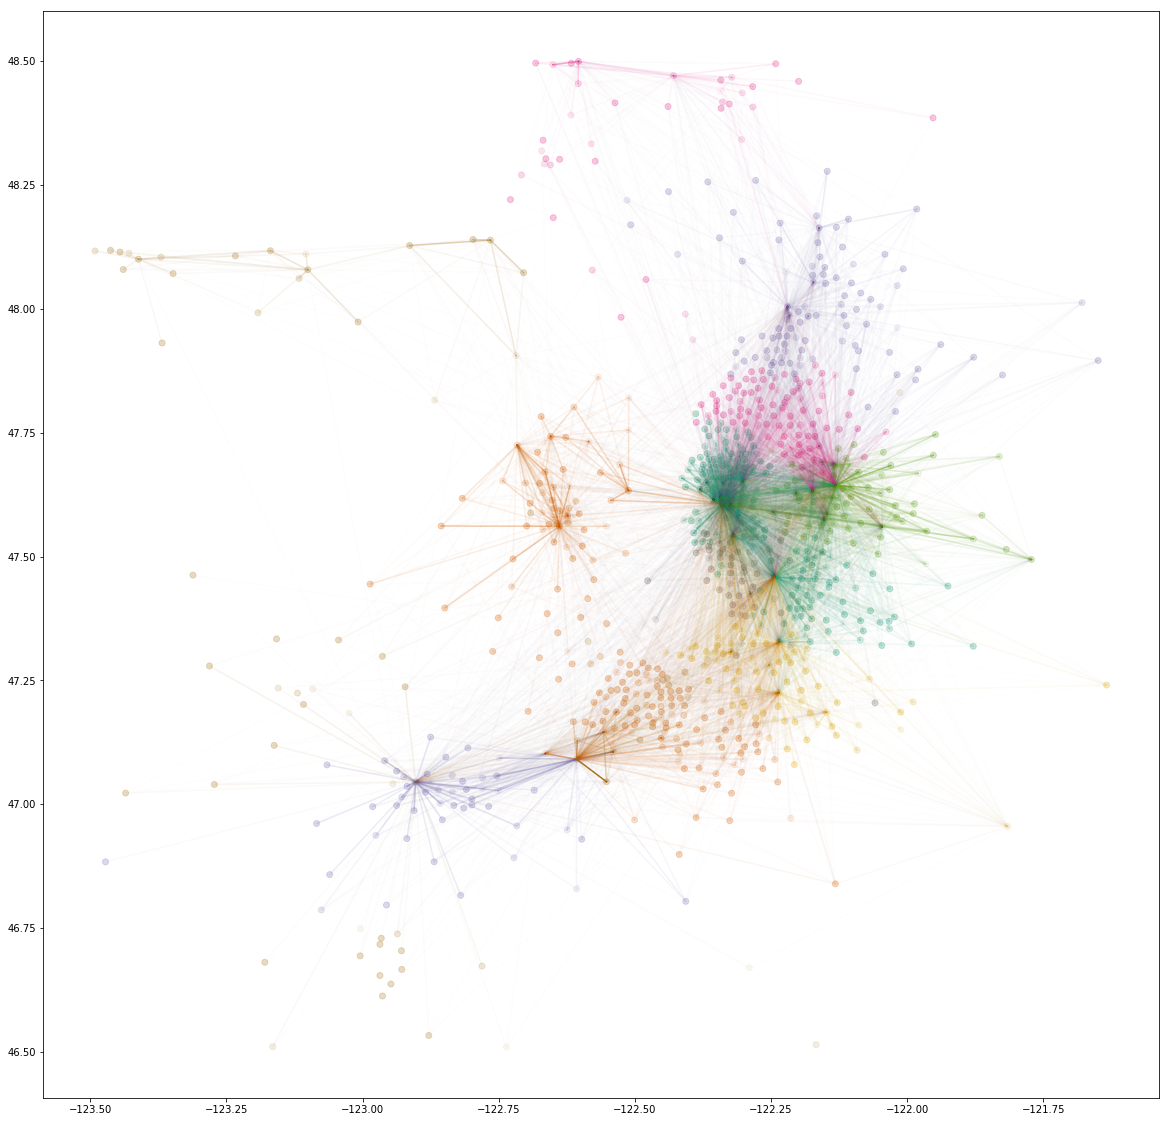

In [11]:
#Testing Seattle Origins
df_area= limit_area(df_merged,minlat=46.5, maxlat=48.5, minlong = -123.5, maxlong=-121.5)
df_results = cluster_and_plot(df_area, df_tracts, dist_method='absolute', link_method='ward', k=12, alpha=0.5, cmap=cm.Dark2, cnum=8)

df_area_colored = df_area.merge(df_results,how='left',left_on='GEOID_O',right_on='GEOID')
n = 10000
df_area_colored_n = df_area_colored.head(n)
flow_max = df_area_colored_n['FLOW'].max()

for i, row in df_area_colored_n.iterrows():
    rgb = (row['r'], row['g'], row['b'])
    plt.plot((row['INTPTLONG_O'],row['INTPTLONG_D']),(row['INTPTLAT_O'],row['INTPTLAT_D']),alpha=row['FLOW']/flow_max, color=rgb)

# Demo Clustering

Figure(layout=FigureLayout(height='420px'))

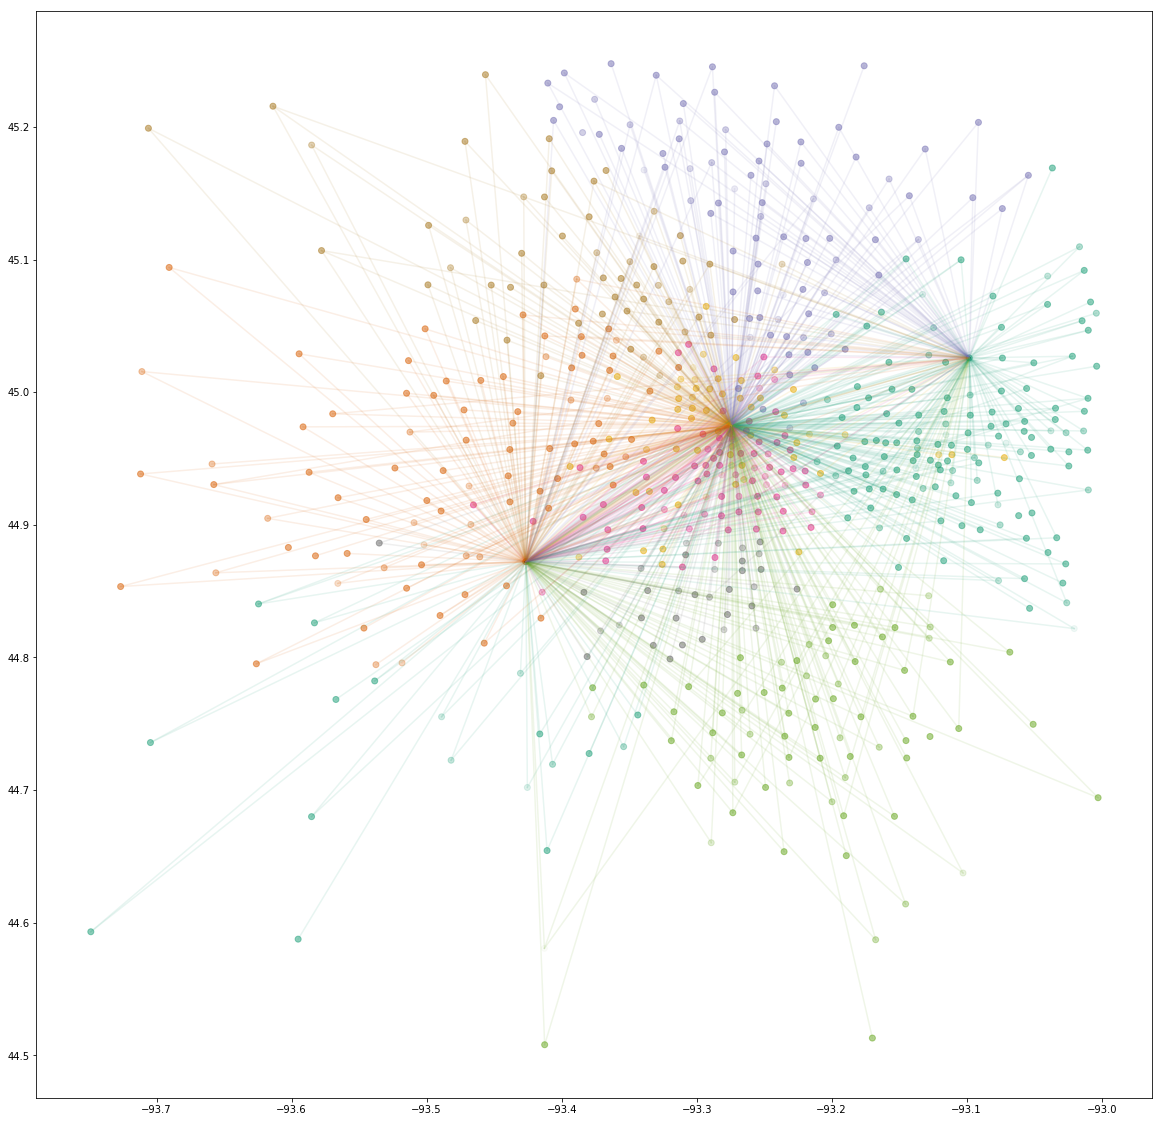

In [28]:
minlat = 44.5
minlong = -93.75
maxlat = 45.25
maxlong = -93
n=1000

df_area= limit_area(df_merged,minlat=minlat, maxlat=maxlat, minlong = minlong, maxlong=maxlong)

df_results = cluster_and_plot(df_area, df_tracts, dist_method='absolute', link_method='ward', k=9, alpha=1, cmap=cm.Dark2, cnum=8)

df_area_colored = df_area.merge(df_results,how='left',left_on='GEOID_O',right_on='GEOID')
df_area_colored_n = df_area_colored.head(n)
flow_max = df_area_colored_n['FLOW'].max()

for i, row in df_area_colored_n.iterrows():
    rgb = (row['r'], row['g'], row['b'])
    plt.plot((row['INTPTLONG_O'],row['INTPTLONG_D']),(row['INTPTLAT_O'],row['INTPTLAT_D']),alpha=0.1, color=rgb)

with open('gmaps_apikey.txt','r') as f:
    api_key = f.readline()

# Use google maps api
gmaps.configure(api_key=api_key)
# Set up your map
fig = gmaps.figure()
colors = get_rgb(df_results)
locations = list(zip(df_results['INTPTLAT'],df_results['INTPTLONG']))
symbols = gmaps.symbol_layer(locations, fill_color=colors, stroke_color=colors, scale=2)
fig.add_layer(symbols)
fig





Figure(layout=FigureLayout(height='420px'))

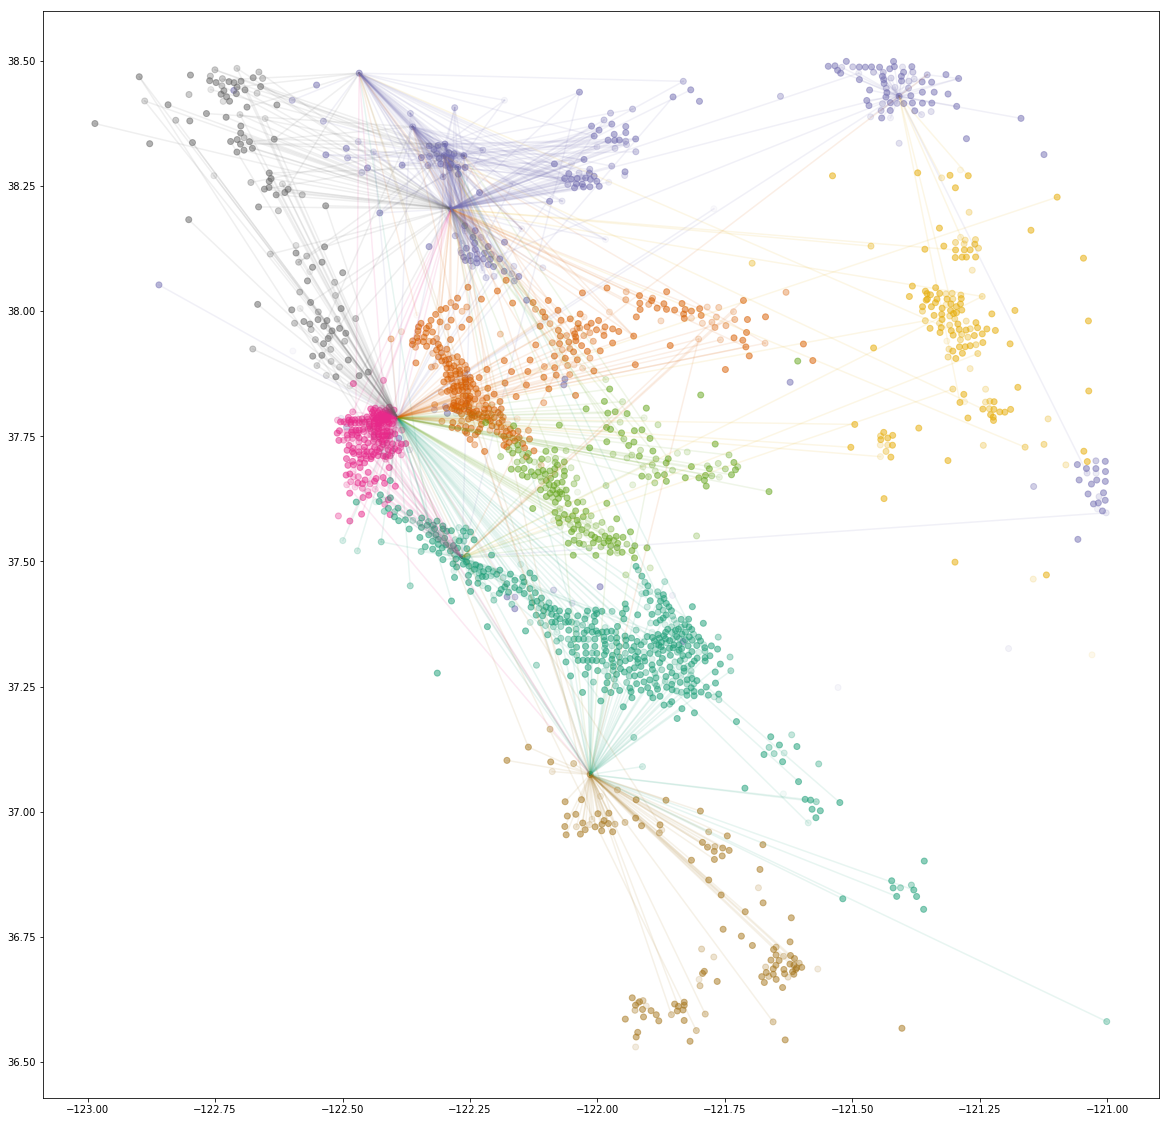

In [26]:
# Bay Area Case
n=1000
df_area= limit_area(df_merged,minlat=36.5,maxlat=38.5,minlong=-123,maxlong=-121)
df_results = cluster_and_plot(df_area, df_tracts, dist_method='absolute', link_method='ward', k=9, alpha=1, cmap=cm.Dark2, cnum=8)

df_area_colored = df_area.merge(df_results,how='left',left_on='GEOID_O',right_on='GEOID')
df_area_colored_n = df_area_colored.head(n)
flow_max = df_area_colored_n['FLOW'].max()

for i, row in df_area_colored_n.iterrows():
    rgb = (row['r'], row['g'], row['b'])
    plt.plot((row['INTPTLONG_O'],row['INTPTLONG_D']),(row['INTPTLAT_O'],row['INTPTLAT_D']),alpha=0.1, color=rgb)

with open('gmaps_apikey.txt','r') as f:
    api_key = f.readline()

# Use google maps api
gmaps.configure(api_key=api_key)
# Set up your map
fig = gmaps.figure()
colors = get_rgb(df_results)
locations = list(zip(df_results['INTPTLAT'],df_results['INTPTLONG']))
symbols = gmaps.symbol_layer(locations, fill_color=colors, stroke_color=colors, scale=2)
fig.add_layer(symbols)
fig